# Dimensionality Reduction using an Autoencoder in Python 
Welcome to this project. We will introduce the theory behind an autoencoder (AE), its uses, and its advantages over PCA, a common dimensionality reduction technique.

## Some Prerequisites
- Basic-to-intermediate level understanding of Python
- Basic theory of neural networks is beneficial, but not required

## Project Outline
[**Task 1**](#task1): Package Importing and Introduction to Project

[**Task 2**](#task2): Dataset Creation and Preprocessing

[**Task 3**](#task3): Create a Baseline Model with PCA

[**Task 4**](#task4): Autoencoder Introduction and Training

[**Task 5**](#task5): Reducing Dimensionality with AE

<a id='task1'></a>
# Task 1: Importing and Introduction

In [1]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [3]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

<a id='task2'></a>
# Task 2: Dataset Creation and Preprocessing

In [4]:
X,y=make_blobs(n_features=50, centers=20, n_samples=20000,cluster_std=0.2,center_box=[-1,1],random_state=17)

In [5]:
X[0]

array([-0.24491985,  0.08099673, -0.36631058, -0.30356551,  0.4029225 ,
        0.65687067,  0.92734294,  0.15492068, -1.10501981,  1.2015462 ,
        0.09578114, -0.75648951, -0.03483697, -0.59523737,  0.02576486,
        0.53523807,  0.08089194, -0.26480015, -0.71277422,  0.07793643,
        0.10326661, -0.92311803, -0.18569531, -0.5761846 , -0.78765359,
       -0.83055169,  0.04446853, -0.26118528,  0.8337965 , -0.59227263,
        0.68834042,  0.17701281,  0.2732509 , -0.00538731,  0.92922794,
        0.62743183,  0.85424358,  0.80721711, -1.14219787,  0.28178435,
        0.55215801,  0.38500603,  0.19163107,  0.55960783,  0.72073584,
       -1.14520866,  1.09184982, -1.04337987,  1.24350139, -0.63786661])

In [6]:
X.shape

(20000, 50)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=17)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

<a id='task3'></a>
# Task 3: Baseline Model

In [8]:
pca =PCA(n_components=2)
pca.fit(X_train)
res_pca=pca.transform(X_test)

In [9]:
res_pca.shape

(2000, 2)

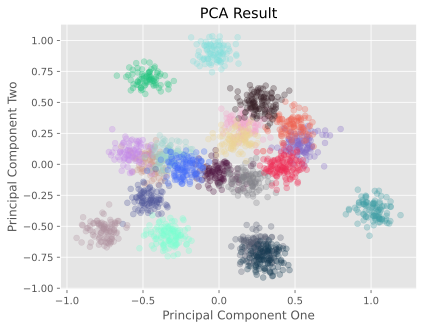

In [10]:
import numpy as np  
import matplotlib.pyplot as plt  

unique_labels = np.unique(y_test)  
for index, label in enumerate(unique_labels):  # Use 'label' instead of 'unique_labels'  
    X_data = res_pca[y_test == label]          # corrected from 'unique_labels' to 'label'  
    plt.scatter(X_data[:, 0], X_data[:, 1], alpha=0.3, c=cols[index])  # Use parentheses  
    
plt.xlabel('Principal Component One')  
plt.ylabel('Principal Component Two')  
plt.title('PCA Result')  
plt.show()  # To display the plot, if needed

<a id='task4'></a>
# Task 4: Autoencoder Theory and Training
![title](Images/ae_viz.pdf)

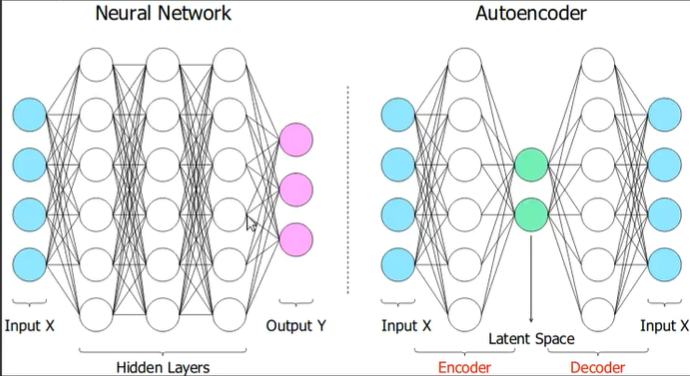

In [ ]:
autoencoder=MLPRegressor(alpha=1e-15,
                         hidden_layer_sizes=(50,100,50,2,50,100,50),
                         random_state=1,max_iter=20000)
autoencoder.fit(X_train,X_train)

<a id='task5'></a>
# Task 5: Reducing Dimensionality with Encoder

In [ ]:
W=autoencoder.coefs_
biases=autoencoder.intercepts_

In [ ]:
for w in W:
    print(w.shape)

In [ ]:
encoder_weights=W[0:4]
encoder_biases=biases[0:4]


In [ ]:
def encode(encoder_weights, encoder_biases ,data):
    res_ae=data
    for index,(w,b) in enumerate(zip(encoder_weights,encoder_biases)):
        if index+1==len(encoder_weights):
            res_ae=res_ae@w+b
        else:
            res_ae=np.maximum(0,res_ae@w+b)
    return res_ae
res_ae=encode(encoder_weights,encoder_biases,X_test)

In [ ]:
res_ae.shape

In [ ]:
unique_labels=np.unique(y_test)
for index,unique_labels in enumerate(unique_labels):
    latent_space=res_ae[y_test==unique_labels]
    plt.scatter(latent_space[:,0],latent_space[:,1],alpha=0.3,c=cols[index])

plt.xlabel('Latent X')
plt.ylabel('Latent Y')
plt.title('AUTOENCODER RESULT')

In [ ]:
silhouette_score(X_test,y_test)

In [ ]:
silhouette_score(res_ae,y_test)

In [ ]:
silhouette_score(res_pca,y_test)